In [0]:
import pandas as pd
import datetime as dt
url = "https://drive.google.com/uc?export=download&id=1F_4Ls5BGW0rFBPYXPZMhk1ROB5EwJy1c"
df = pd.read_excel(url)

In [134]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
def get_month(y): return dt.datetime(y.year,y.month,1)

In [0]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

In [0]:
#grouping by customerID and using InvoiceMonth for futher manipulation
group  = df.groupby('CustomerID')['InvoiceMonth']

In [0]:
#Assigining the smallest invoice date to the customer (first purchase)
df['CohortMonth'] = group.transform('min')

In [139]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [0]:
def get_date_int(df,col):
  year = df[col].dt.year
  month = df[col].dt.month
  day = df[col].dt.day
  return year, month, day

In [0]:
invoice_year,invoice_month,_=get_date_int(df,'InvoiceMonth')
cohort_year, cohort_month,_ = get_date_int(df,'CohortMonth')

In [0]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [143]:
df['CohortIndex'] = years_diff *12 + months_diff +1
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5.0


In [0]:
group = df.groupby(['CohortMonth','CohortIndex'])

In [0]:
cohort_data = group['CustomerID'].apply(pd.Series.nunique)

In [0]:
cohort_data = cohort_data.reset_index()

In [0]:
cohort_counts = cohort_data.pivot(index = 'CohortMonth',columns='CohortIndex',values='CustomerID')

In [148]:
print(cohort_counts)

CohortIndex   1.0    2.0    3.0    4.0   ...   10.0   11.0   12.0   13.0
CohortMonth                              ...                            
2010-12-01   948.0  362.0  317.0  367.0  ...  374.0  354.0  474.0  260.0
2011-01-01   421.0  101.0  119.0  102.0  ...  146.0  155.0   63.0    NaN
2011-02-01   380.0   94.0   73.0  106.0  ...  119.0   35.0    NaN    NaN
2011-03-01   440.0   84.0  112.0   96.0  ...   39.0    NaN    NaN    NaN
2011-04-01   299.0   68.0   66.0   63.0  ...    NaN    NaN    NaN    NaN
2011-05-01   279.0   66.0   48.0   48.0  ...    NaN    NaN    NaN    NaN
2011-06-01   235.0   49.0   44.0   64.0  ...    NaN    NaN    NaN    NaN
2011-07-01   191.0   40.0   39.0   44.0  ...    NaN    NaN    NaN    NaN
2011-08-01   167.0   42.0   42.0   42.0  ...    NaN    NaN    NaN    NaN
2011-09-01   298.0   89.0   97.0   36.0  ...    NaN    NaN    NaN    NaN
2011-10-01   352.0   93.0   46.0    NaN  ...    NaN    NaN    NaN    NaN
2011-11-01   321.0   43.0    NaN    NaN  ...    NaN

In [0]:
 cohort_sizes = cohort_counts.iloc[:,0]

In [0]:
#set axis = 0 to divide along the row
retention = cohort_counts.divide(cohort_sizes,axis = 0)

In [151]:
#rounding to 3 digits and converting to %
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
group = df.groupby(['CohortMonth','CohortIndex'])
cohort_data_avg = group['Quantity'].mean()

In [0]:
cohort_data_avg = cohort_data_avg.reset_index()
average_quantity = cohort_data_avg.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')

In [154]:
print(average_quantity.round(1))

CohortIndex  1.0   2.0   3.0   4.0   5.0   ...  9.0   10.0  11.0  12.0  13.0
CohortMonth                                ...                              
2010-12-01   11.0  14.6  15.0  14.8  12.9  ...  16.7  16.7  17.3  12.8  14.8
2011-01-01   10.0  12.6  12.3  10.9  12.2  ...  11.4   9.9   9.1   9.5   NaN
2011-02-01   10.8  12.1  18.6  12.0  11.1  ...  10.3  11.9  12.6   NaN   NaN
2011-03-01    9.8   9.9  12.2   9.5  13.6  ...  10.5   8.9   NaN   NaN   NaN
2011-04-01    9.8  10.1   9.4  11.6  11.5  ...   7.3   NaN   NaN   NaN   NaN
2011-05-01   10.9   9.0  13.9  11.8  10.9  ...   NaN   NaN   NaN   NaN   NaN
2011-06-01   10.3  13.7  10.5  13.3  10.2  ...   NaN   NaN   NaN   NaN   NaN
2011-07-01    9.7  12.7   7.1   7.8   6.0  ...   NaN   NaN   NaN   NaN   NaN
2011-08-01    9.9   6.0   5.3   6.0   7.0  ...   NaN   NaN   NaN   NaN   NaN
2011-09-01   11.9   5.5   7.6   8.8   NaN  ...   NaN   NaN   NaN   NaN   NaN
2011-10-01    8.4   6.9   8.0   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

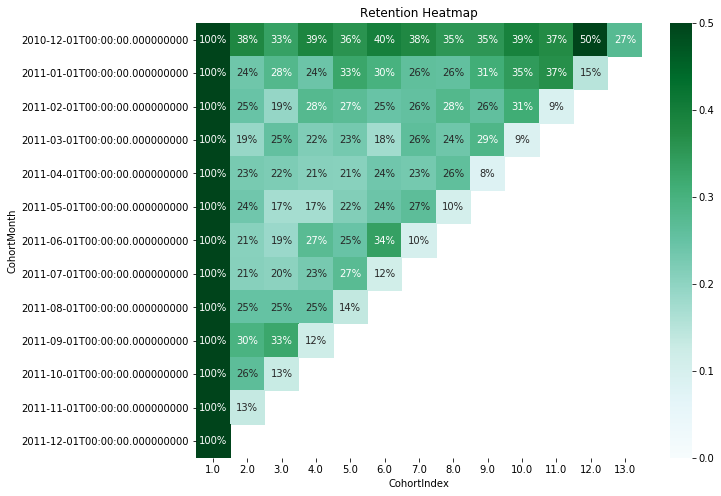

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.title('Retention Heatmap')

sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0, vmax = 0.5, cmap = 'BuGn')

In [0]:
df['TotalSum'] = df.UnitPrice*df.Quantity

In [0]:
# craeting a hypothetical date for calulating RFM metrics
snapshot_date = max(df.InvoiceDate)+dt.timedelta(days=1)

In [0]:
#calculate data on customer level
datamart = df.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x:(snapshot_date - x.max()).days,
    'InvoiceNo':'count',
    'TotalSum':'sum'})

In [0]:
datamart.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalSum':'MonetaryValue'}, inplace = True)

In [160]:
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [0]:
#generating labels
r_labels = range(4,0,-1) #for recency lower value is better so assigning reverse
r_quartile = pd.qcut(datamart['Recency'],4,labels=r_labels)
datamart = datamart.assign(R = r_quartile.values)

In [0]:
f_labels = range(1,5) 
m_labels = range(1,5) 

f_quartile = pd.qcut(datamart['Frequency'],4,labels=f_labels)
m_quartile = pd.qcut(datamart['MonetaryValue'],4,labels=m_labels)

datamart = datamart.assign(F = f_quartile.values)
datamart = datamart.assign(M = m_quartile.values)

In [163]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [0]:
#function to concatinate thr RFM
def join_rfm(x):return str(x['R'])+str(x['F'])+str(x['M'])

In [0]:
datamart['RFM_Segment']= datamart.apply(join_rfm,axis = 1)
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis = 1)

In [166]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [167]:
datamart.groupby('RFM_Score').agg({'Recency':'mean',
                         'Frequency':'mean',
                         'MonetaryValue':['mean','count']}),round(1)

(              Recency   Frequency MonetaryValue      
                  mean        mean          mean count
 RFM_Score                                            
 3.0        264.772959    7.829082    109.076148   392
 4.0        174.514066   13.930946    227.094118   391
 5.0        153.036750   21.166344    346.758745   517
 6.0         94.267094   28.482906    491.776498   468
 7.0         78.807606   39.671141    724.172685   447
 8.0         62.743041   56.997859    974.716188   467
 9.0         44.228710   79.034063   1369.558010   411
 10.0        31.275000  115.263636   1894.047227   440
 11.0        20.508152  193.913043   3845.725652   368
 12.0         6.694268  371.825902   8850.731805   471, 1)

In [0]:
#grouping customers into categories
def segment_me(df):
  if df['RFM_Score']>=9:
    return 'High Value'
  elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
    return 'Medium Value'
  else:
    return 'Low Value'

In [0]:
datamart['General_Segment'] = datamart.apply(segment_me, axis = 1)

In [170]:
datamart.groupby('General_Segment').agg({'Recency':'mean',
                         'Frequency':'mean',
                         'MonetaryValue':['mean','count']}),round(1)

(                    Recency   Frequency MonetaryValue      
                        mean        mean          mean count
 General_Segment                                            
 High Value        25.230178  195.082249   4130.290439  1690
 Low Value        219.701149   10.876117    168.009770   783
 Medium Value      98.875724   36.136914    625.762676  1899, 1)

### **K - Means**

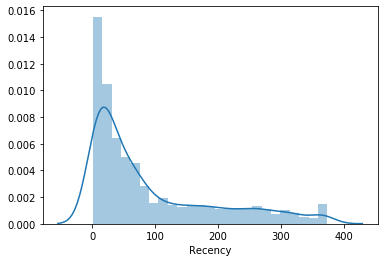

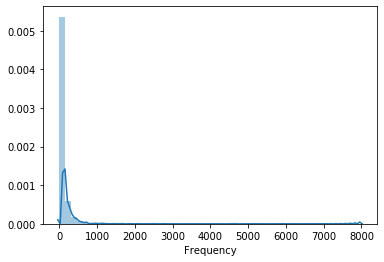

In [171]:
#K-means requre normal distribution, hence checking for skew
sns.distplot(datamart['Recency'])
plt.show()
sns.distplot(datamart['Frequency'])
plt.show()

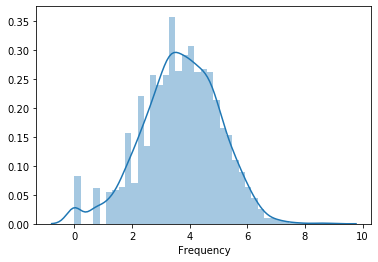

In [172]:
#logrithmic transformation
import numpy as np
frequency_log = np.log(datamart['Frequency'])
sns.distplot(frequency_log)
plt.show()

In [0]:
datamart_rfm=datamart.iloc[:,0:3]

In [0]:
#scaling and centering data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

In [0]:
from sklearn.cluster import KMeans

sse={}#std sum of squared error

for k in range(1,11):
  kmeans  = KMeans(n_clusters = k, random_state = 1)
  kmeans.fit(datamart_normalized)
  sse[k] = kmeans.inertia_#sum of squared distance to closest cluster center

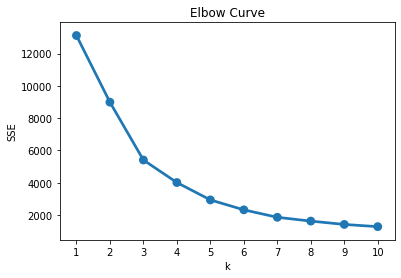

In [176]:
#plot SSE for each K using elbow curve
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x= list(sse.keys()),y=list(sse.values()))
plt.show()

4 is the optimal number of cluster

In [0]:
datamart_k4.groupby('Cluster').agg({'Recency':'mean',
                         'Frequency':'mean',
                         'MonetaryValue':['mean','count']}),round(1)

In [0]:
# Choose k=4 and fit data set to k-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(datamart_normalized)

# Assign k-means labels to cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels to original pre-transformed data set
datamart_k4 = datamart_rfm.assign(Cluster = cluster_labels)

In [180]:
datamart_k4.groupby('Cluster').agg({'Recency':'mean',
                         'Frequency':'mean',
                         'MonetaryValue':['mean','count']}),round(1)

(            Recency    Frequency  MonetaryValue      
                mean         mean           mean count
 Cluster                                              
 0         40.224365   106.487297    2012.813151  3267
 1        247.229927    27.565693     460.382820  1096
 2          2.000000  5914.000000   64776.602500     4
 3          9.000000  1013.400000  192103.854000     5, 1)

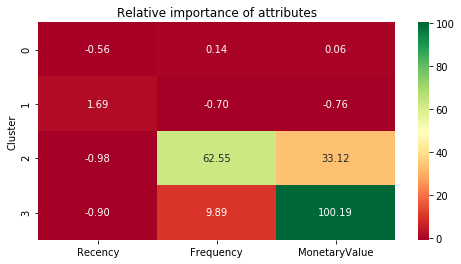

In [183]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_k4.groupby(['Cluster']).mean()
# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 4))
# Add the plot title
plt.title('Relative importance of attributes')
# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

The heatmap shows the relative importance of the segment. The further the ratio is from 0 the more important the attribute is for the segment relative to the total population.